In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./ushape.csv', header=None)
df.columns = ['X', 'Y', 'class']

In [3]:
df.head()

,X,Y,class
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0


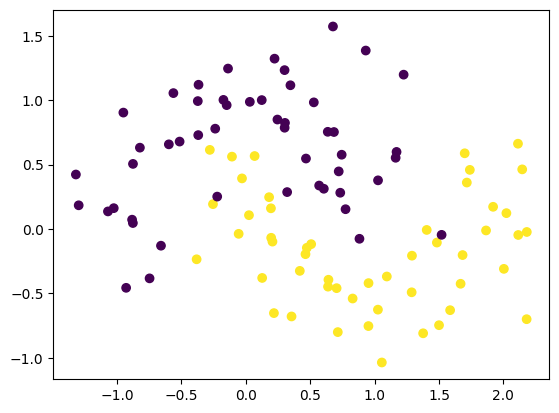

In [4]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [5]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [6]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [7]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu')) # or just , kernel_initializer='he_normal'
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

c:\python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Set parameters to 0
model.get_weights()

[array([[ 0.2837444 , -0.18843889,  0.07338709,  0.6105625 ,  0.39736098,
          0.15918642,  0.4545893 , -0.4336678 ,  0.20446736, -0.4891917 ],
        [ 0.42507356, -0.5914929 ,  0.67475635, -0.1165244 ,  0.5943766 ,
         -0.5445449 , -0.07190943, -0.64343786,  0.11209816,  0.10213041]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.33528507, -0.06052628,  0.14833158, -0.05419722,  0.11057502,
          0.14212656,  0.46225727, -0.42724672,  0.02077121,  0.15847766],
        [-0.12025791,  0.11640209, -0.1313991 , -0.339943  ,  0.34246504,
          0.37077284, -0.13984561,  0.03918612,  0.47247827,  0.10747224],
        [ 0.2643882 , -0.1427047 , -0.01209801,  0.17637742,  0.1438191 ,
         -0.25841856,  0.49161017,  0.49305725,  0.39445484,  0.4706794 ],
        [ 0.12330192,  0.4076107 , -0.32110867, -0.15869653,  0.1742518 ,
          0.5095724 , -0.26762563, -0.21243161,  0.17173111,  0.32087755],
        [ 0.14813

In [9]:
initial_weights = model.get_weights()

In [10]:
initial_weights[0] = np.random.randn(model.get_weights()[0].shape[0], model.get_weights()[0].shape[1])*(2/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(model.get_weights()[2].shape[0], model.get_weights()[2].shape[1])*(2/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(model.get_weights()[4].shape[0], model.get_weights()[4].shape[1])*(2/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(model.get_weights()[6].shape[0], model.get_weights()[6].shape[1])*(2/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(model.get_weights()[8].shape[0], model.get_weights()[8].shape[1])*(2/10)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)


In [11]:
model.set_weights(initial_weights)

In [12]:
model.get_weights()

[array([[-0.64372   , -0.01745224, -1.814458  , -2.055795  , -1.7891587 ,
         -0.69759876,  1.6797005 , -0.33803084, -1.7475984 ,  0.04398889],
        [ 0.11078978,  1.1751791 ,  1.2739309 , -0.21306215,  1.4818465 ,
         -1.1922163 , -0.21128076,  1.53888   ,  0.6254159 , -0.7555599 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.19488522,  0.16482097, -0.04995483,  0.02158505,  0.2636365 ,
         -0.09156628, -0.06041862, -0.19643399, -0.2771876 ,  0.00268624],
        [-0.00366329,  0.3584586 , -0.02032744,  0.14137521,  0.19047233,
          0.1863445 , -0.07247946, -0.11225962, -0.2421592 ,  0.28896073],
        [-0.40016443,  0.18826382, -0.20714754,  0.08027804,  0.08256831,
          0.12107503, -0.02695604, -0.36818534, -0.02596868, -0.08901877],
        [ 0.28216726, -0.0431346 , -0.09756591, -0.07944779,  0.08357816,
          0.08341921,  0.11525424, -0.0342643 ,  0.0168955 , -0.02613347],
        [ 0.06381

In [13]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 158ms/step - accuracy: 0.5352 - loss: 0.6895 - val_accuracy: 0.5000 - val_loss: 0.6909
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4766 - loss: 0.6892 - val_accuracy: 0.5000 - val_loss: 0.6885
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5078 - loss: 0.6865 - val_accuracy: 0.5000 - val_loss: 0.6862
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4602 - loss: 0.6853 - val_accuracy: 0.5000 - val_loss: 0.6841
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4781 - loss: 0.6838 - val_accuracy: 0.5500 - val_loss: 0.6820
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5602 - loss: 0.6819 - val_accuracy: 0.8000 - val_loss: 0.6801
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6367 - loss: 0.6806 - val_accuracy: 0.8000 - val_loss: 0.6784
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6828 - loss: 0.6792 - val_accuracy: 0.8500 - val_loss

In [15]:
model.get_weights() # see how much small the weights are

[array([[-0.8243507 ,  0.1261599 , -1.8955711 , -2.3016798 , -1.9485369 ,
         -0.4626584 ,  1.855372  , -0.27173617, -1.9298235 , -0.06107568],
        [ 0.16121483,  1.4212892 ,  1.4367216 , -0.33017573,  1.4944651 ,
         -1.3448678 , -0.48178354,  1.7312231 ,  0.61837786, -0.91650313]],
       dtype=float32),
 array([-0.14294888,  0.21757385, -0.13224259,  0.03065617,  0.04034766,
         0.18321571,  0.19934197,  0.14643958, -0.15749352,  0.08000027],
       dtype=float32),
 array([[-0.29785773,  0.29157528, -0.02762496,  0.24222569,  0.41377172,
          0.0971739 , -0.11306429, -0.15658052, -0.3686276 , -0.0972283 ],
        [-0.17892347,  0.44454512,  0.22713348,  0.36376825,  0.44076166,
          0.39718044, -0.2759686 , -0.3084978 , -0.4147305 ,  0.10747328],
        [-0.5057835 ,  0.2576858 , -0.09411158,  0.2402838 ,  0.28077152,
          0.24456659, -0.15592012, -0.36751023, -0.13418804, -0.1776216 ],
        [ 0.24770637,  0.08754436, -0.21665871,  0.1116506 , 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step


<Axes: >

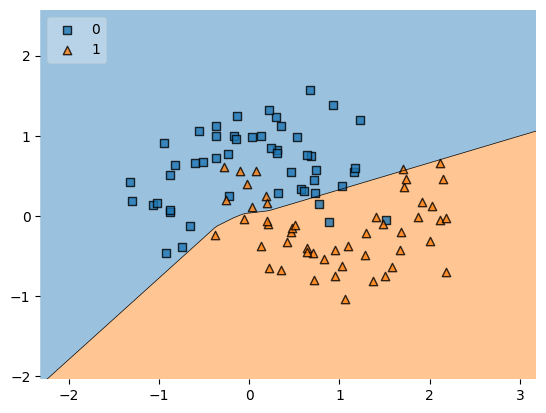

In [16]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

In [17]:
model2 = Sequential()

model2.add(Dense(10,activation='relu',input_dim=2, kernel_initializer='he_uniform'))
model2.add(Dense(10,activation='relu', kernel_initializer='he_uniform'))
model2.add(Dense(10,activation='relu', kernel_initializer='he_uniform'))
model2.add(Dense(10,activation='relu', kernel_initializer='he_uniform'))
model2.add(Dense(1,activation='sigmoid'))

model2.summary()

c:\python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model2.get_weights()

[array([[-1.1240286 ,  1.3898717 , -0.77464175,  1.4392608 , -1.3362353 ,
          1.1133186 , -0.01801097, -1.6290636 ,  0.62536085, -1.0493009 ],
        [ 0.43549526,  1.4408602 , -1.0615115 ,  0.72349083,  0.24715865,
         -1.3663193 ,  1.0706514 ,  0.23814595,  0.984486  ,  0.81986105]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.19406193, -0.1575625 ,  0.06792557,  0.35103214, -0.21454036,
         -0.34161025, -0.56624657, -0.1658538 ,  0.17574626,  0.33837652],
        [ 0.02074617,  0.4972    , -0.13962746,  0.70725155,  0.08932686,
         -0.4309788 ,  0.42617428,  0.62601304,  0.17348212, -0.34873992],
        [ 0.6518372 , -0.70560366, -0.74617875, -0.6949311 , -0.23993653,
          0.4815402 , -0.22330445,  0.00655073,  0.64221394, -0.00198454],
        [-0.22436225, -0.09481364, -0.7441288 , -0.11712903,  0.55074227,
          0.38158214,  0.18811047,  0.69717   , -0.24167109, -0.44853857],
        [ 0.55110

In [19]:
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [20]:
history2 = model2.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 155ms/step - accuracy: 0.5000 - loss: 1.3774 - val_accuracy: 0.5000 - val_loss: 1.1189
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5195 - loss: 1.1576 - val_accuracy: 0.5000 - val_loss: 1.0373
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5063 - loss: 1.1539 - val_accuracy: 0.5500 - val_loss: 0.9650
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5758 - loss: 0.9666 - val_accuracy: 0.6000 - val_loss: 0.9013
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5508 - loss: 1.0120 - val_accuracy: 0.6000 - val_loss: 0.8461
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5781 - loss: 0.8472 - val_accuracy: 0.5500 - val_loss: 0.7972
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5641 - loss: 0.8046 - val_accuracy: 0.5500 - val_loss: 0.7536
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5820 - loss: 0.7522 - val_accuracy: 0.6000 - val_loss

In [21]:
model2.get_weights()

[array([[-1.1964028 ,  1.3781402 , -0.58667266,  1.4291173 , -1.2728512 ,
          1.2257531 , -0.0966832 , -1.6603924 ,  0.57609254, -1.1793966 ],
        [ 0.49918017,  1.5587734 , -1.1850106 ,  0.66018194,  0.24815735,
         -1.5275823 ,  1.0125715 ,  0.2431077 ,  0.9455412 ,  0.7679047 ]],
       dtype=float32),
 array([ 0.04514953,  0.04543885, -0.02557787, -0.07964796, -0.14692391,
         0.1001447 , -0.06567001, -0.1099363 , -0.0073102 , -0.01174764],
       dtype=float32),
 array([[-2.5403136e-01, -1.5858503e-01,  6.9502898e-02,  4.2090499e-01,
         -2.0535088e-01, -4.1276410e-01, -5.9474146e-01, -2.0497404e-01,
          3.8119495e-02,  4.1871196e-01],
        [-2.7691567e-02,  5.4329598e-01, -1.3813801e-01,  7.7677047e-01,
          1.4256155e-01, -4.6039876e-01,  3.6910534e-01,  5.8174652e-01,
          2.7471796e-01, -2.2491160e-01],
        [ 5.8850121e-01, -5.9183925e-01, -7.4617875e-01, -6.2565726e-01,
         -2.9597076e-02,  4.0480736e-01, -3.7900752e-01,  1

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step


<Axes: >

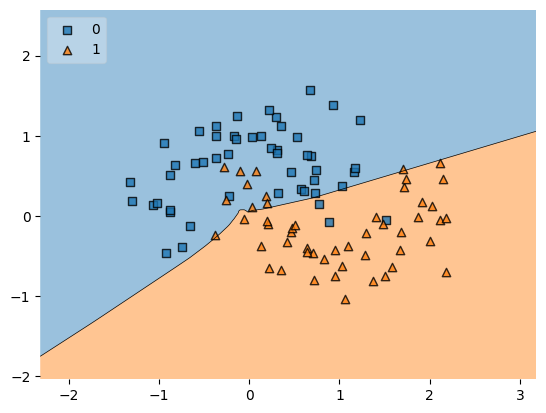

In [22]:

plot_decision_regions(X,y.astype('int'), clf=model2, legend=2) # wow star like!! 